# Wykorzystanie rozkładów macierzy do rozwiązywania oznaczonych układów równań

Poznane na wykładzie rozkłady (faktoryzacje) macierzy możemy wykorzystać do rozwiązywania układów równań liniowych. Dzięki wykorzystaniu specjalnych własności macierzy występujących w rozkładzie jesteśmy w stanie w łatwiejszy sposób odwrócić macierz i tym samym zminimalizować błąd.


**Zadanie 1.**

Rozważmy układ równań $Ax=b$, w którym:
* $A$ jest macierzą Hilberta o wymiarach 15x15.
* $A$ jest macierzą wartości losowych z przedziału $[0,100]$ o wymiarach 100x100,  1000x1000 i 1000000x1000000.
* $b$ jest wektorem wartości losowych, odpowiednio, o wymiarach 15x1, 100x1, 1000x1 i 1000000x1.

1. Oblicz współczynnik uwarunkowania macierzy $A$ i oceń jej uwarunkowanie.
2. Rozwiąż układ równań następującymi metodami:
    * z użyciem jawnej odwrotności $A$.
    * korzystając z rozkładu [LU](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html) (uwaga na macierz permutacji!):
        * z wykorzystaniem odwrotności L i U.
        * z użyciem jedynie odwrotności i metody podstawiania wstecznego.
    * korzystając z rozkładu [QR](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html):
        * z wykorzystaniem odwrotności Q i R.
        * z użyciem jedynie odwrotności Q i metody podstawiania wstecznego.
    * za pomocą jednej z metod iteracyjnych z poprzedniego ćwiczenia.
    * za pomocą metody [`solve`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) z pakietu NumPy.
3. Porównaj otrzymane wyniki. W tym celu oblicz normy z residuuów otrzymanych dla każdego z rozwiązań. Którą z metod cechuje najwyższa dokladność?
4. Przeprowadź porównanie wydajności ww. metod. Zmierz czas wykonania każdej metody. Aby otrzymać bardziej sensowny wynik należy powtórzyć obliczenia w pętli (np. 100 lub 1000 razy) i uśrednić wynik. Do pomiaru czasu wykonania możesz wykorzystać pakiet `time`.
Wskazówka: Do rozwiązania układu z macierzą trójkątną możesz wykorzystać funkcję [`scipy.linalg.solve_triangular`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

        
        


In [ ]:
import numpy as np
from scipy.linalg import hilbert, lu, lu_solve, qr, solve_triangular
from numpy.linalg import inv, cond, solve

# Generowanie danych
np.random.seed(42)  # Ustawienie ziarna dla powtarzalności wyników

# Macierze i wektory
A_hilbert = hilbert(15)
b_hilbert = np.random.rand(15, 1)

A_random_100 = np.random.rand(100, 100) * 100
b_random_100 = np.random.rand(100, 1)

A_random_1000 = np.random.rand(1000, 1000) * 100
b_random_1000 = np.random.rand(1000, 1)

# A_random_1000000 = np.random.rand(1000000, 1000000) * 100  # Dla dużych danych, patrz uwagi poniżej
# b_random_1000000 = np.random.rand(1000000, 1)

# Wyświetlenie uwarunkowania
print("Współczynnik uwarunkowania macierzy Hilberta (15x15):", cond(A_hilbert))
print("Współczynnik uwarunkowania losowej macierzy (100x100):", cond(A_random_100))
print("Współczynnik uwarunkowania losowej macierzy (1000x1000):", cond(A_random_1000))

def solve_inverse(A, b):
    A_inv = inv(A)
    return A_inv @ b

x_hilbert_inv = solve_inverse(A_hilbert, b_hilbert)
x_random_100_inv = solve_inverse(A_random_100, b_random_100)
x_random_1000_inv = solve_inverse(A_random_1000, b_random_1000)

def solve_lu(A, b):
    P, L, U = lu(A)
    y = solve_triangular(L, P @ b, lower=True)
    x = solve_triangular(U, y)
    return x

x_hilbert_lu = solve_lu(A_hilbert, b_hilbert)
x_random_100_lu = solve_lu(A_random_100, b_random_100)
x_random_1000_lu = solve_lu(A_random_1000, b_random_1000)

def solve_qr(A, b):
    Q, R = qr(A)
    y = Q.T @ b
    x = solve_triangular(R, y)
    return x

x_hilbert_qr = solve_qr(A_hilbert, b_hilbert)
x_random_100_qr = solve_qr(A_random_100, b_random_100)
x_random_1000_qr = solve_qr(A_random_1000, b_random_1000)

# Rozwiązanie za pomocą Gauss-Seidel
def gauss_seidel(A, b, tol=1e-10, max_iterations=1000):
    x = np.zeros_like(b)
    for k in range(max_iterations):
        x_new = np.copy(x)
        for i in range(A.shape[0]):
            sum1 = np.dot(A[i, :i], x_new[:i])
            sum2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - sum1 - sum2) / A[i, i]
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new
    return x

x_hilbert_gs = gauss_seidel(A_hilbert, b_hilbert)
x_random_100_gs = gauss_seidel(A_random_100, b_random_100)
x_random_1000_gs = gauss_seidel(A_random_1000, b_random_1000)

# Rozwiązanie za pomocą metody solve
x_hilbert_solve = solve(A_hilbert, b_hilbert)
x_random_100_solve = solve(A_random_100, b_random_100)
x_random_1000_solve = solve(A_random_1000, b_random_1000)

# Obliczenie norm z residuum
def residual_norm(A, x, b):
    r = b - A @ x
    return np.linalg.norm(r)

# Hilbert matrix
residuals_hilbert = {
    'inverse': residual_norm(A_hilbert, x_hilbert_inv, b_hilbert),
    'lu': residual_norm(A_hilbert, x_hilbert_lu, b_hilbert),
    'qr': residual_norm(A_hilbert, x_hilbert_qr, b_hilbert),
    'gauss_seidel': residual_norm(A_hilbert, x_hilbert_gs, b_hilbert),
    'solve': residual_norm(A_hilbert, x_hilbert_solve, b_hilbert)
}

# Random 100x100 matrix
residuals_random_100 = {
    'inverse': residual_norm(A_random_100, x_random_100_inv, b_random_100),
    'lu': residual_norm(A_random_100, x_random_100_lu, b_random_100),
    'qr': residual_norm(A_random_100, x_random_100_qr, b_random_100),
    'gauss_seidel': residual_norm(A_random_100, x_random_100_gs, b_random_100),
    'solve': residual_norm(A_random_100, x_random_100_solve, b_random_100)
}

# Random 1000x1000 matrix
residuals_random_1000 = {
    'inverse': residual_norm(A_random_1000, x_random_1000_inv, b_random_1000),
    'lu': residual_norm(A_random_1000, x_random_1000_lu, b_random_1000),
    'qr': residual_norm(A_random_1000, x_random_1000_qr, b_random_1000),
    'gauss_seidel': residual_norm(A_random_1000, x_random_1000_gs, b_random_1000),
    'solve': residual_norm(A_random_1000, x_random_1000_solve, b_random_1000)
}

print("Residual norms for Hilbert matrix:")
print(residuals_hilbert)

print("Residual norms for random 100x100 matrix:")
print(residuals_random_100)

print("Residual norms for random 1000x1000 matrix:")
print(residuals_random_1000)

# Pomiar wydajności metod
import time

def time_method(method, A, b, num_repeats=100):
    start_time = time.time()
    for _ in range(num_repeats):
        method(A, b)
    end_time = time.time()
    return (end_time - start_time) / num_repeats

# Pomiar czasu dla macierzy Hilberta
time_hilbert = {
    'inverse': time_method(solve_inverse, A_hilbert, b_hilbert),
    'lu': time_method(solve_lu, A_hilbert, b_hilbert),
    'qr': time_method(solve_qr, A_hilbert, b_hilbert),
    'gauss_seidel': time_method(gauss_seidel, A_hilbert, b_hilbert),
    'solve': time_method(solve, A_hilbert, b_hilbert)
}

# Pomiar czasu dla macierzy losowej 100x100
time_random_100 = {
    'inverse': time_method(solve_inverse, A_random_100, b_random_100),
    'lu': time_method(solve_lu, A_random_100, b_random_100),
    'qr': time_method(solve_qr, A_random_100, b_random_100),
    'gauss_seidel': time_method(gauss_seidel, A_random_100, b_random_100),
    'solve': time_method(solve, A_random_100, b_random_100)
}

# Pomiar czasu dla macierzy losowej 1000x1000
time_random_1000 = {
    'inverse': time_method(solve_inverse, A_random_1000, b_random_1000),
    'lu': time_method(solve_lu, A_random_1000, b_random_1000),
    'qr': time_method(solve_qr, A_random_1000, b_random_1000),
    'gauss_seidel': time_method(gauss_seidel, A_random_1000, b_random_1000),
    'solve': time_method(solve, A_random_1000, b_random_1000)
}

print("Execution time for Hilbert matrix:")
print(time_hilbert)

print("Execution time for random 100x100 matrix:")
print(time_random_100)

print("Execution time for random 1000x1000 matrix:")
print(time_random_1000)

Współczynnik uwarunkowania macierzy Hilberta (15x15): 7.363760217251835e+17
Współczynnik uwarunkowania losowej macierzy (100x100): 337663.6998493511
Współczynnik uwarunkowania losowej macierzy (1000x1000): 76401.09984820882
Residual norms for Hilbert matrix:
{'inverse': 6.307005123637942, 'lu': 1.901554924085147, 'qr': 14.433262109938395, 'gauss_seidel': 1.269984069776631, 'solve': 1.271581301044504}
Residual norms for random 100x100 matrix:
{'inverse': 1.454276034099729e-11, 'lu': 4.406442871484658, 'qr': 4.330267455394736e-12, 'gauss_seidel': nan, 'solve': 1.0301737121961399e-11}
Residual norms for random 1000x1000 matrix:
{'inverse': 1.5371970090029188e-11, 'lu': 13.303965491384032, 'qr': 2.6331786283720946e-12, 'gauss_seidel': nan, 'solve': 1.6779256682290535e-11}


# Interpolacja

**Zadanie 2.**

Przeprowadź interpolacje poniższych funkcji $f(x)$ za pomocą wielomianów interpolacyjnych Lagrange'a ([`scipy.interpolate.lagrange`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html)). Stwórz wykresy funkcji interpolacyjnych i zaznacz na nich punkty, w ktorych dokonano oceny wartości funkcji.

Pierwsza funkcja:

* $f(0) = 1$,
* $f(0.25) = 1.64872$,
* $f(0.5) = 2.71828$,
* $f(0.75) = 4.48169.$

Oblicz $f(0.43)$.

Druga funkcja:

* $f_2(0.1) = 0.62049958$,
* $f_2(0.2) = -0.28398668$,
* $f_2(0.3) = 0.00660095$,
* $f_2(0.4) = 0.24842440$. 

Oblicz $f_2(0.25)$.

Interpolowana wartość f(0.43) dla pierwszej funkcji: 2.360604734079999


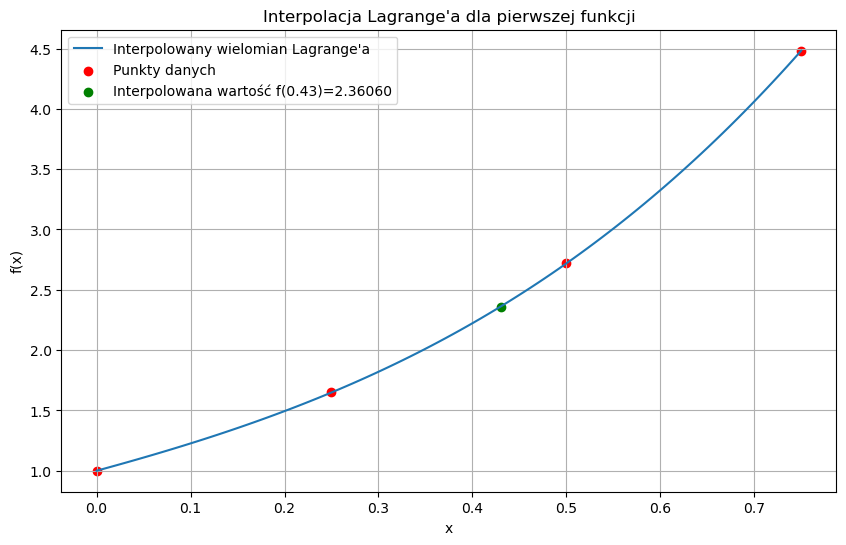

Interpolowana wartość f_2(0.25) dla drugiej funkcji: -0.21033722187500237


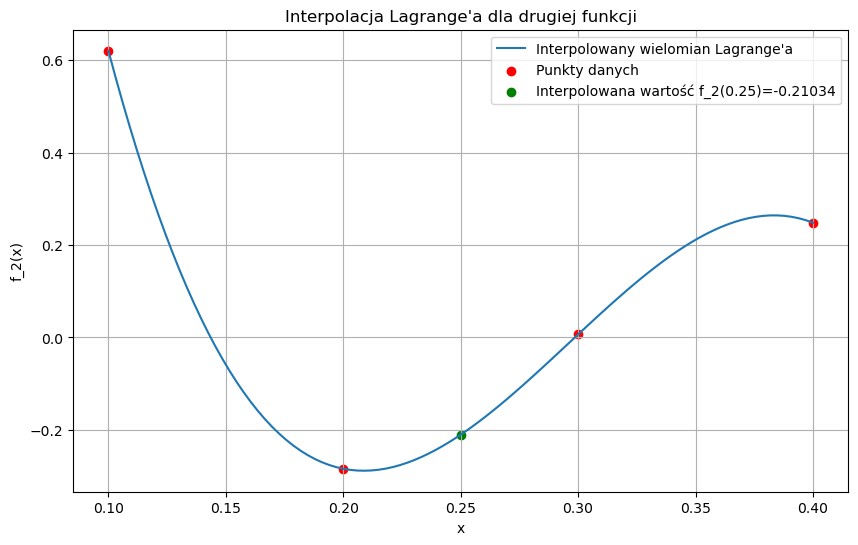

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Punkty dla pierwszej funkcji
x1 = np.array([0, 0.25, 0.5, 0.75])
y1 = np.array([1, 1.64872, 2.71828, 4.48169])

# Interpolacja Lagrange'a dla pierwszej funkcji
poly1 = lagrange(x1, y1)

# Obliczenie wartości w punkcie 0.43
f_0_43 = poly1(0.43)
print(f"Interpolowana wartość f(0.43) dla pierwszej funkcji: {f_0_43}")

# Rysowanie wykresu dla pierwszej funkcji
x_plot = np.linspace(0, 0.75, 100)
y_plot = poly1(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Interpolowany wielomian Lagrange\'a')
plt.scatter(x1, y1, color='red', label='Punkty danych')
plt.scatter(0.43, f_0_43, color='green', label=f'Interpolowana wartość f(0.43)={f_0_43:.5f}')
plt.title('Interpolacja Lagrange\'a dla pierwszej funkcji')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Punkty dla drugiej funkcji
x2 = np.array([0.1, 0.2, 0.3, 0.4])
y2 = np.array([0.62049958, -0.28398668, 0.00660095, 0.24842440])

# Interpolacja Lagrange'a dla drugiej funkcji
poly2 = lagrange(x2, y2)

# Obliczenie wartości w punkcie 0.25
f2_0_25 = poly2(0.25)
print(f"Interpolowana wartość f_2(0.25) dla drugiej funkcji: {f2_0_25}")

# Rysowanie wykresu dla drugiej funkcji
x_plot2 = np.linspace(0.1, 0.4, 100)
y_plot2 = poly2(x_plot2)

plt.figure(figsize=(10, 6))
plt.plot(x_plot2, y_plot2, label='Interpolowany wielomian Lagrange\'a')
plt.scatter(x2, y2, color='red', label='Punkty danych')
plt.scatter(0.25, f2_0_25, color='green', label=f'Interpolowana wartość f_2(0.25)={f2_0_25:.5f}')
plt.title('Interpolacja Lagrange\'a dla drugiej funkcji')
plt.xlabel('x')
plt.ylabel('f_2(x)')
plt.legend()
plt.grid(True)
plt.show()


***Zadanie 3.***

Rozważmy funkcję $f(x)=\frac{1}{25x^2+1}$. 

Przeprowadź interpolacje funkcji $f$ w przedziale $[-2,2]$ wielomianem Lagrange'a oraz funkcjami sklejanymi 3 stopnia w:
- 21 równoodległych węzłach,
- 21 węzłach [Czebyszewa](https://pl.wikipedia.org/wiki/Węzły_Czebyszewa).

**Wskazówka** Interpolację funkcjami sklejanymi możesz przeprowadzić za pomocą funkcji [`interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d).

Umieść wielomian interpolacyjny, oryginalną funkcję $f$ oraz węzly interpolacyjne na wspólnym wykresie (jeden wykres dla metody Lagrange'a oraz jeden dla funkcji sklejanych). Porównaj otrzymane rezultaty. Przeprowadź te same działania dla przedziału $x\in[-5,5]$. Jakie problemy możesz zauważyć na otrzymanych wykresach?

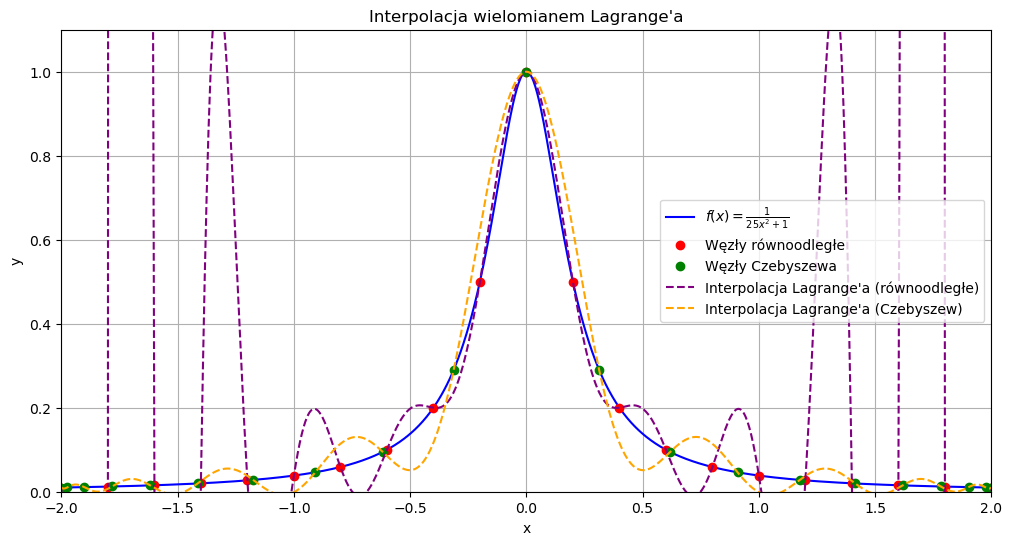

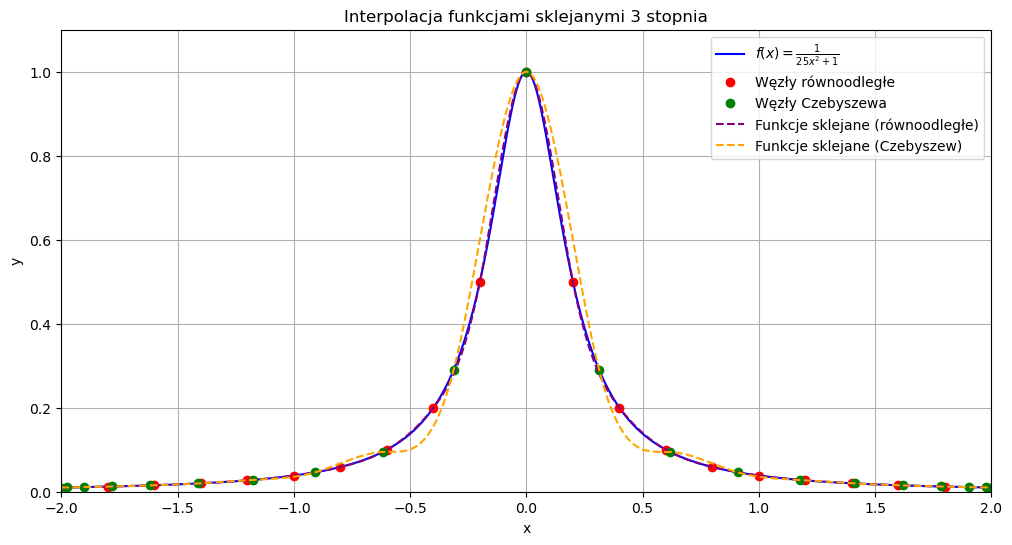

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import interp1d

# Funkcja f(x)
def f(x):
    return 1 / (25 * x**2 + 1)

# 21 równoodległych węzłów
x_eq = np.linspace(-2, 2, 21)

# 21 węzłów Czebyszewa
x_cheb = np.cos(np.linspace(0, np.pi, 21))
x_cheb = (x_cheb + 1) * 2 - 2

# Obliczenie wielomianu Lagrange'a dla równoodległych węzłów
poly_eq = lagrange(x_eq, f(x_eq))

# Obliczenie wielomianu Lagrange'a dla węzłów Czebyszewa
poly_cheb = lagrange(x_cheb, f(x_cheb))

# Przygotowanie punktów do wykresu funkcji f(x)
x_plot = np.linspace(-2, 2, 1000)
y_plot = f(x_plot)

# Wykres dla interpolacji wielomianem Lagrange'a
plt.figure(figsize=(12, 6))

plt.plot(x_plot, y_plot, label='$f(x)=\\frac{1}{25x^2+1}$', color='blue')
plt.plot(x_eq, f(x_eq), 'o', label='Węzły równoodległe', color='red')
plt.plot(x_cheb, f(x_cheb), 'o', label='Węzły Czebyszewa', color='green')

plt.plot(x_plot, poly_eq(x_plot), '--', label='Interpolacja Lagrange\'a (równoodległe)', color='purple')
plt.plot(x_plot, poly_cheb(x_plot), '--', label='Interpolacja Lagrange\'a (Czebyszew)', color='orange')

plt.title('Interpolacja wielomianem Lagrange\'a')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1)
plt.xlim(-2, 2)
plt.show()

# Interpolacja funkcjami sklejanymi 3 stopnia

# Funkcje sklejane dla równoodległych węzłów
interp_eq = interp1d(x_eq, f(x_eq), kind='cubic')

# Funkcje sklejane dla węzłów Czebyszewa
interp_cheb = interp1d(x_cheb, f(x_cheb), kind='cubic')

# Wykres dla funkcji sklejanych
plt.figure(figsize=(12, 6))

plt.plot(x_plot, y_plot, label='$f(x)=\\frac{1}{25x^2+1}$', color='blue')
plt.plot(x_eq, f(x_eq), 'o', label='Węzły równoodległe', color='red')
plt.plot(x_cheb, f(x_cheb), 'o', label='Węzły Czebyszewa', color='green')

plt.plot(x_plot, interp_eq(x_plot), '--', label='Funkcje sklejane (równoodległe)', color='purple')
plt.plot(x_plot, interp_cheb(x_plot), '--', label='Funkcje sklejane (Czebyszew)', color='orange')

plt.title('Interpolacja funkcjami sklejanymi 3 stopnia')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1)
plt.xlim(-2, 2)
plt.show()

***Zadanie 4.***

Kierowca jadący z miasta A do miasta B, zauważywszy na drodze fotoradar, zaczął gwałtownie hamować. Przebieg jego położenia, zarejestrowany przez nawigację, pokazano w poniższej tabeli. Wiedząc, że radar znajduje się w punkcie o współrzędnej 79.6 m, oszacuj kiedy kierowca minął fotoradar (w tym celu skorzystaj z jednej z metod z laboratorium 3) oraz z jaką prędkością wtedy jechał (wykorzystaj relację drogi i prędkości znaną z fizyki). 

|czas \[s\]|położenie \[m\]|
|--|--|
|0.0|0.0|
|1.0|42.7|
|2.0|73.2|
|3.0|92.5|

**Zadanie dla zainteresowanych programowaniem funkcyjnym w Pythonie**

Stwórz funkcję znajdującą wielomian interpolacyjny metodą Lagrange'a. Funkcja powinna przyjmować dwie listy:
* listę argumentów ($x$-ów)
* listę wartości ($y$-ów).  


Po wykonaniu obliczeń funkcja powinna zwracać wielomian w postaci obiektu typu **funkcja** (a nie `numpy.Polynomial`).

**Wskazówka** Wykorzystaj wyrażenia *lambda*. Dla ułatwienia możesz się też posłużyć pakietami `operator` i `functools`.
